In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt


In [2]:
data = pd.read_csv("data_clean.csv")


In [3]:
data.shape

(75804, 37)

In [4]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT'],
      dtype='object')

In [5]:
data.sample(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT
55271,A17340810638654307936,201812,181000.0,2413.333333,75,3,1,0,0,0,...,7.0,0,0,1,5.759321,0.254957,3.987105,-3.641829,40.437851,Ciudad Lineal
11360,A15468147981748861791,201803,1212000.0,4282.685512,283,4,2,0,1,0,...,3.0,0,1,0,2.889737,0.344845,0.767274,-3.679636,40.434914,Salamanca
13611,A18237943896650205333,201803,484000.0,5041.666667,96,2,1,0,1,1,...,6.0,0,0,1,2.133717,0.437833,2.650608,-3.721137,40.430483,Moncloa-Aravaca
39279,A16518084259000284301,201806,165000.0,2426.470588,68,3,1,1,1,0,...,5.0,0,1,0,4.150526,0.225538,1.282987,-3.705631,40.453848,Tetuan
20941,A9423942576356889094,201812,128000.0,2560.000000,50,3,1,0,0,0,...,6.0,0,0,1,6.255425,0.310033,6.536182,-3.771957,40.395064,Latina
1021,A16056747227153367858,201803,382000.0,5457.142857,70,3,1,0,1,1,...,4.0,0,0,1,0.724583,0.144250,1.172939,-3.706804,40.410499,Centro
45335,A7453571193237328006,201806,125000.0,1736.111111,72,2,1,1,0,0,...,6.0,0,0,1,4.278631,0.072409,3.734464,-3.739028,40.389072,Carabanchel
57808,A5960671154497039995,201809,125000.0,1984.126984,63,2,1,0,0,0,...,7.0,0,0,1,8.608203,0.154817,7.509126,-3.603381,40.404986,Vicalvaro
75623,A2475595956241058536,201806,384000.0,4266.666667,90,3,2,1,1,1,...,4.0,0,0,1,10.634352,0.239073,8.453455,-3.589712,40.456426,Barajas
9769,A18437942302981136852,201803,163000.0,5433.333333,30,2,1,0,0,0,...,5.0,0,0,1,1.348706,0.215488,1.477296,-3.707569,40.428359,Centro


In [7]:
drop_cols = ['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'LONGITUDE', 'LATITUDE']

cols_for_model = [col for col in data.columns if col not in drop_cols] + ['PRICE']
data_clean = data[cols_for_model].dropna()

X = data_clean.drop(columns=['PRICE'])
y = data_clean['PRICE']

# One-hot encoding para 'DISTRICT'
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

district_encoded = ohe.fit_transform(X[['DISTRICT']])
district_cols = ohe.get_feature_names_out(['DISTRICT'])

# Crear nuevo DataFrame con las columnas codificadas
import numpy as np
X_encoded = pd.concat([
    X.drop(columns=['DISTRICT']).reset_index(drop=True),
    pd.DataFrame(district_encoded, columns=district_cols)
], axis=1)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir modelo y parámetros para GridSearch
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 50825.83
RMSE: 108668.20
R²: 0.9350


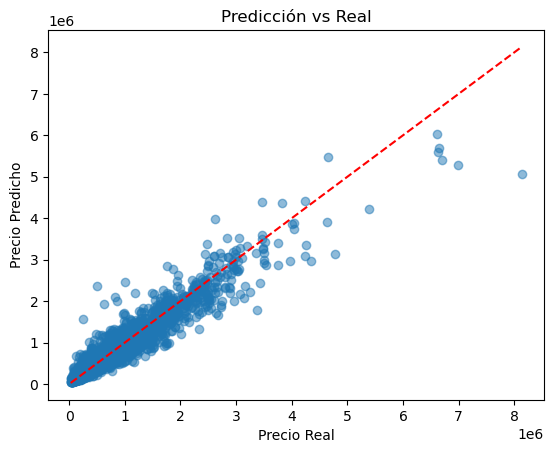

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicción vs Real')
plt.show()

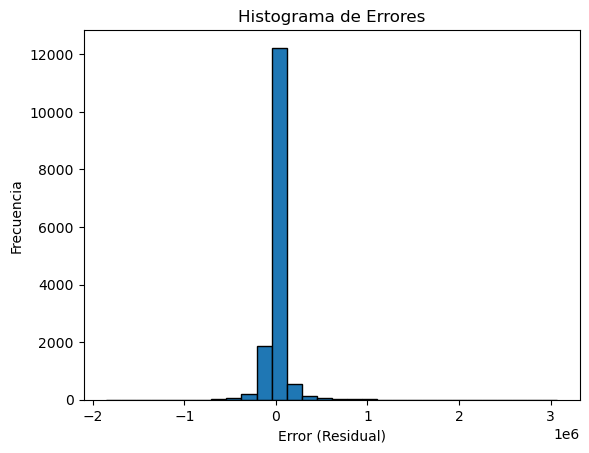

In [9]:
residuals = y_test - y_pred

plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.show()

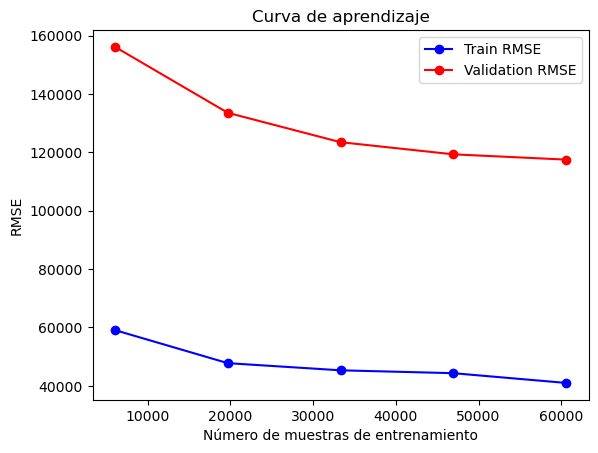

In [10]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_encoded, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', color='blue', label='Train RMSE')
plt.plot(train_sizes, np.sqrt(test_scores_mean), 'o-', color='red', label='Validation RMSE')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

In [14]:
import pandas as pd
import numpy as np

# Supongamos que ya tienes y_test y y_pred

# Crear DataFrame con valores reales, predichos y error porcentual absoluto
df_errors = pd.DataFrame({
    'real': y_test,
    'predicho': y_pred
})

df_errors['ape'] = np.abs(df_errors['real'] - df_errors['predicho']) / df_errors['real'] * 100  # error % absoluto

# Definir rangos de error para agrupar
bins = [0, 5, 10, 15, 20, 25, 50, 100, np.inf]
labels = ['<=5%', '<=10%', '<=15%', '<=20%', '<=25%', '<=50%', '<=100%', '>100%']

df_errors['rango_error'] = pd.cut(df_errors['ape'], bins=bins, labels=labels, right=True)

# Contar porcentaje de predicciones en cada rango
tabla_error = df_errors['rango_error'].value_counts(normalize=True).sort_index() * 100

tabla_error

# Opcional: mostrar en formato tabla ordenada
tabla_error_df = tabla_error.reset_index()
tabla_error_df.columns = ['Rango de error %', 'Porcentaje de predicciones']
tabla_error_df


,Rango de error %,Porcentaje de predicciones
0,<=5%,30.947507
1,<=10%,22.277980
2,<=15%,15.259161
3,<=20%,10.518323
4,<=25%,6.523605
5,<=50%,11.132387
6,<=100%,2.608121
7,>100%,0.732915


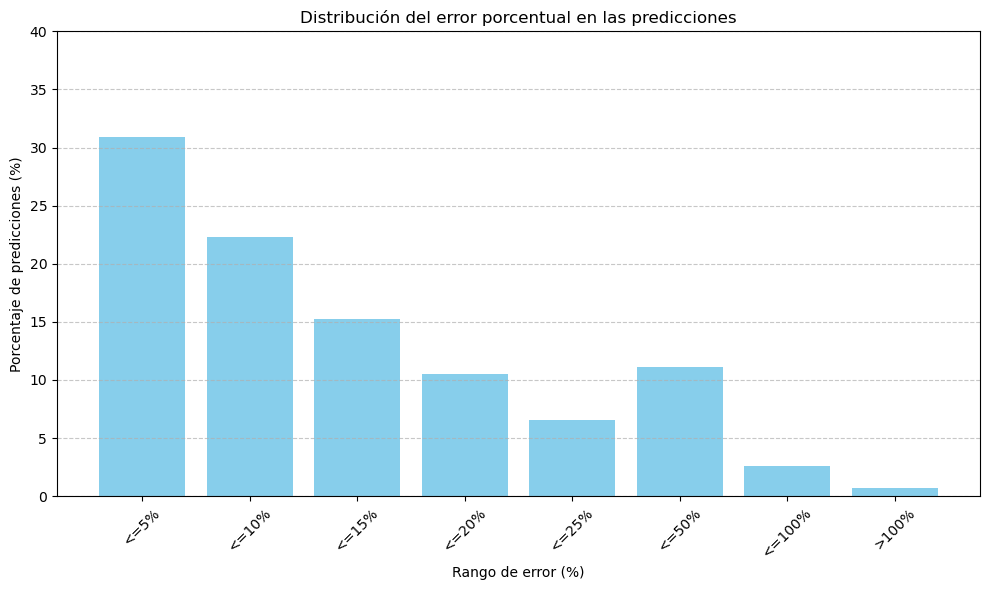

In [15]:
plt.figure(figsize=(10,6))
plt.bar(tabla_error_df['Rango de error %'], tabla_error_df['Porcentaje de predicciones'], color='skyblue')
plt.xlabel('Rango de error (%)')
plt.ylabel('Porcentaje de predicciones (%)')
plt.title('Distribución del error porcentual en las predicciones')
plt.xticks(rotation=45)
plt.ylim(0, 40)  # ajusta según tu escala para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns
df_eval['bathrooms'] = X_test_original['BATHNUMBER'].values  # recuerda guardar columna original

plt.figure(figsize=(10,6))
sns.boxplot(x='bathrooms', y='ape', data=df_eval)
plt.title('Distribución de error porcentual por número de baños')
plt.show()

NameError: name 'X_test_original' is not defined